#Male Fertility Analysis 

* [Data Source](https://archive.ics.uci.edu/ml/datasets/Fertility) 


In [165]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

#We add column names to the file
column_names = [ 'season', 'age', 'diseases', 'trauma', 'surgical_intervention', 'fevers', 'alcohol_consumption', 'smoker', 'sedentary_hours', 'diagnosis']

#Added headers
df = pd.read_csv("https://raw.githubusercontent.com/GilSat/GFinProject/main/Fertility_Diags.csv", header=None, names = column_names)

#Creating second copy
df_original = df.copy()

#Check our dimensions which should be 100 entries with 10 data types
print('The dimensions of the data are: ', df.shape)

#show the beginning of the data
df.head(10)

The dimensions of the data are:  (100, 10)


,season,age,diseases,trauma,surgical_intervention,fevers,alcohol_consumption,smoker,sedentary_hours,diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,1
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,0
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,1
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,1
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,0
5,-0.33,0.67,1,0,1,0,0.8,0,0.50,1
6,-0.33,0.67,0,0,0,-1,0.8,-1,0.44,1
7,-0.33,1.00,1,1,1,0,0.6,-1,0.38,1
8,1.00,0.64,0,0,1,0,0.8,-1,0.25,1
9,1.00,0.61,1,0,0,0,1.0,-1,0.25,1


In [166]:
#check if we have any empty data
df.isna().sum()

season                   0
age                      0
diseases                 0
trauma                   0
surgical_intervention    0
fevers                   0
alcohol_consumption      0
smoker                   0
sedentary_hours          0
diagnosis                0
dtype: int64

In [167]:
#check how many unique values we have in each column
df.nunique()

season                    4
age                      18
diseases                  2
trauma                    2
surgical_intervention     2
fevers                    3
alcohol_consumption       5
smoker                    3
sedentary_hours          14
diagnosis                 2
dtype: int64

In [139]:
#Helps us make our numbers consistent, ie if a category contains a float the non-float nums become a float 

df[[ 'season', 'age', 'diseases', 'trauma', 'surgical_intervention', 'fevers', 'alcohol_consumption', 'smoker', 'sedentary_hours']] = \
    df[[ 'season', 'age', 'diseases', 'trauma', 'surgical_intervention', 'fevers', 'alcohol_consumption', 'smoker', 'sedentary_hours']].apply(pd.to_numeric)

df.head(10)

,season,age,diseases,trauma,surgical_intervention,fevers,alcohol_consumption,smoker,sedentary_hours,diagnosis
1,-0.33,0.69,0,1,1,0,0.8,0,0.88,1.0
2,-0.33,0.94,1,0,1,0,0.8,1,0.31,0.0
3,-0.33,0.50,1,0,0,0,1.0,-1,0.50,1.0
4,-0.33,0.75,0,1,1,0,1.0,-1,0.38,1.0
5,-0.33,0.67,1,1,0,0,0.8,-1,0.50,0.0
6,-0.33,0.67,1,0,1,0,0.8,0,0.50,1.0
7,-0.33,0.67,0,0,0,-1,0.8,-1,0.44,1.0
8,-0.33,1.00,1,1,1,0,0.6,-1,0.38,1.0
9,1.00,0.64,0,0,1,0,0.8,-1,0.25,1.0
10,1.00,0.61,1,0,0,0,1.0,-1,0.25,1.0


In [142]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 100 non-null    float64
 1   age                    100 non-null    float64
 2   diseases               100 non-null    int64  
 3   trauma                 100 non-null    int64  
 4   surgical_intervention  100 non-null    int64  
 5   fevers                 100 non-null    int64  
 6   alcohol_consumption    100 non-null    float64
 7   smoker                 100 non-null    int64  
 8   sedentary_hours        100 non-null    float64
 9   diagnosis              100 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 8.6 KB


In [143]:
#Get some basic stats on our data

df.describe()

,season,age,diseases,trauma,surgical_intervention,fevers,alcohol_consumption,smoker,sedentary_hours,diagnosis
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.078900,0.669000,0.870000,0.440000,0.510000,0.190000,0.832000,-0.350000,0.406800,0.880000
std,0.796725,0.121319,0.337998,0.498888,0.502418,0.580752,0.167501,0.808728,0.186395,0.326599
min,-1.000000,0.500000,0.000000,0.000000,0.000000,-1.000000,0.200000,-1.000000,0.060000,0.000000
25%,-1.000000,0.560000,1.000000,0.000000,0.000000,0.000000,0.800000,-1.000000,0.250000,1.000000
50%,-0.330000,0.670000,1.000000,0.000000,1.000000,0.000000,0.800000,-1.000000,0.380000,1.000000
75%,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Graphing the data

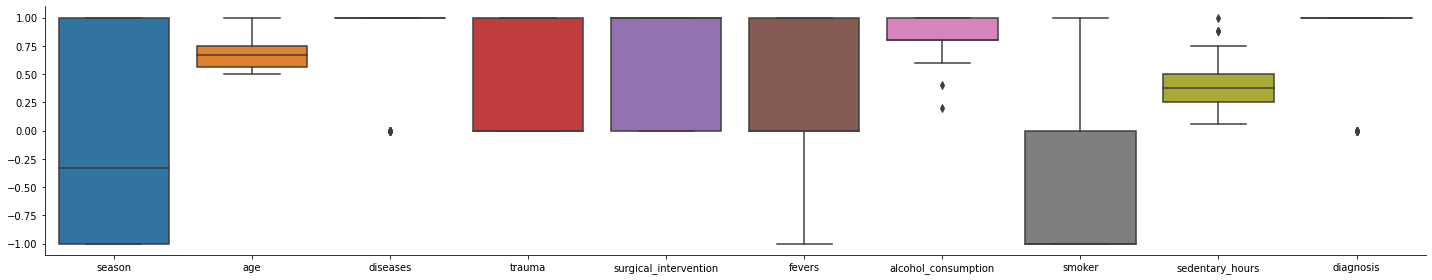

In [144]:
#Let's see the data in a catplot to view it 
sns.catplot(data=df , kind='box', height=4, aspect=5)

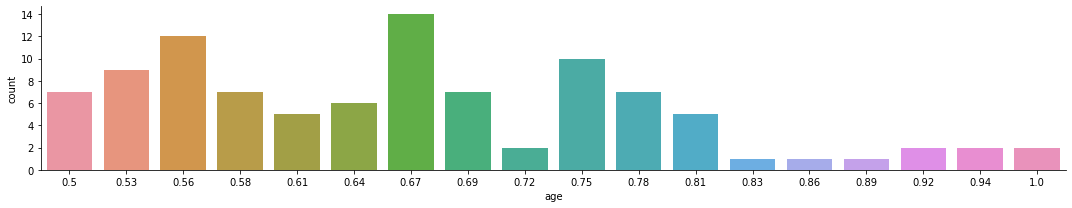

In [145]:
#Shows different ages tested 
sns.catplot(x='age', data=df , kind='count', height = 3, aspect=5)

In [146]:
#See how many are fertile or not
print(df['diagnosis'].value_counts())

1.0    88
0.0    12
Name: diagnosis, dtype: int64


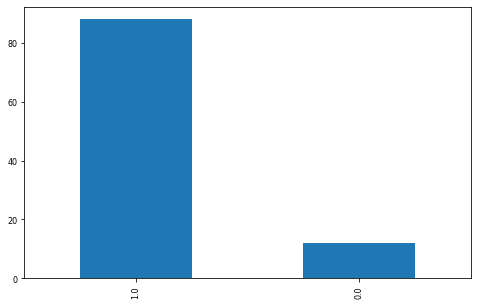

In [147]:
#Now graphically 
plt.figure(figsize=(8,5))
df['diagnosis'].value_counts().plot(kind='bar', fontsize = 8)

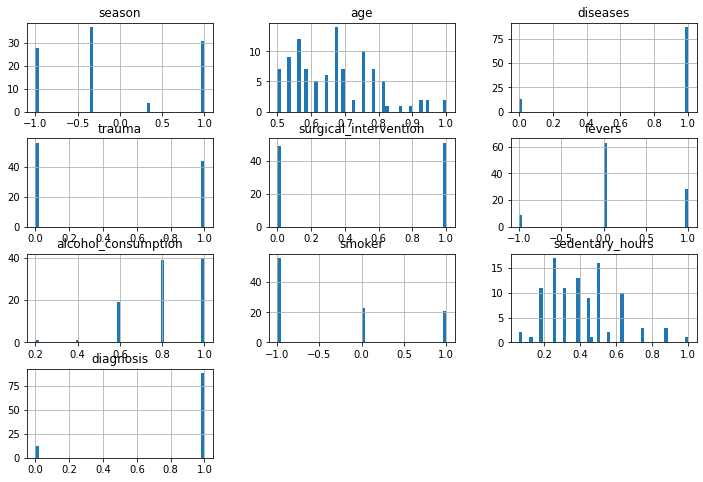

In [150]:
#Show how much of each datatype we have

df.hist(bins=50, figsize=(12,8))
plt.show()

##Correlation Matrix



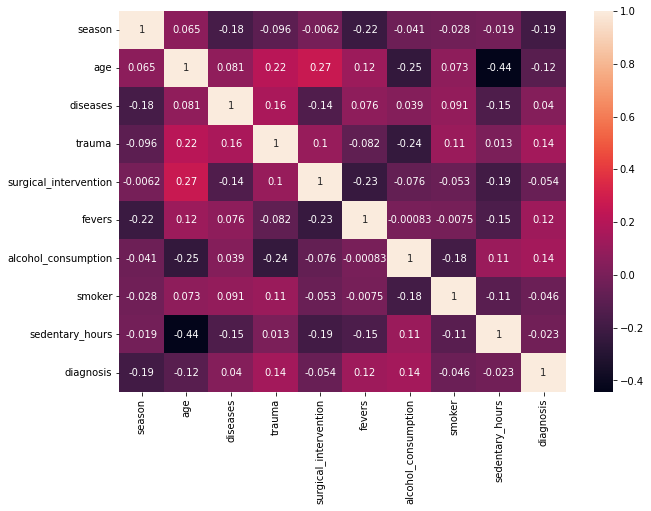

In [151]:
corrMatrix = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [152]:
#It seems like sedentary hours is the most correlated
corrMatrix["sedentary_hours"].sort_values(ascending=False)

sedentary_hours          1.000000
alcohol_consumption      0.111371
trauma                   0.013122
season                  -0.019021
diagnosis               -0.022964
smoker                  -0.106007
diseases                -0.147761
fevers                  -0.151091
surgical_intervention   -0.192726
age                     -0.442452
Name: sedentary_hours, dtype: float64

No handles with labels found to put in legend.


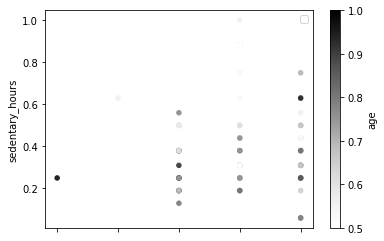

In [91]:
#Using a scatter plott to try and vizualise a correlation
df.plot(kind="scatter", x="alcohol_consumption", y="sedentary_hours",c="age",)
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56ae9ee110>,
      dtype=object)

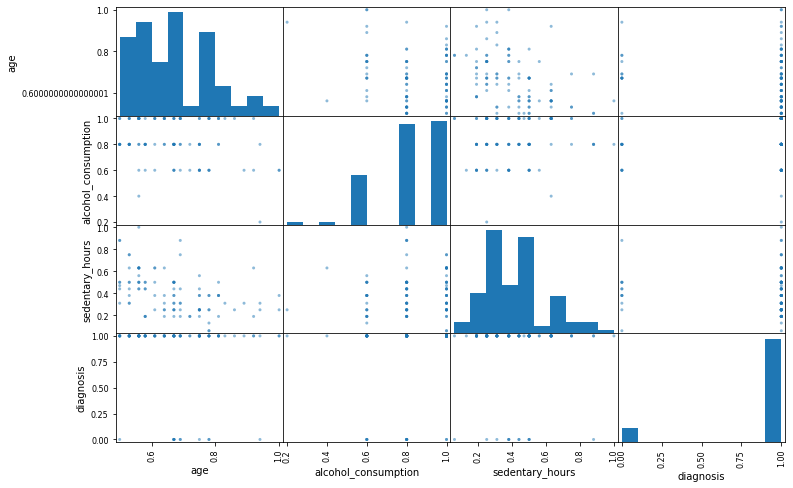

In [156]:
#let's now look at a few good attributes to compare
#we want to see if we are missing anything in a non-linear relationship
from pandas.plotting import scatter_matrix

attributes = ['age', 'alcohol_consumption', 'sedentary_hours','diagnosis']
scatter_matrix(df[attributes], figsize=(12, 8))

In [169]:
#Dropping yes/no categorial data 
df_SI = df.copy()
df_SI.drop(['season','diseases', 'trauma', 'surgical_intervention', 'fevers', 'smoker', 'diagnosis'], axis = 1, inplace= True)

#Create a Model

We will start with a linear regression model

In [172]:
from sklearn.linear_model import LinearRegression

#take out mpg, because that is what we are going to be studying
y = df_SI['alcohol_consumption'].copy()
X = df_SI.drop(['alcohol_consumption'], axis = 1)

lin_reg = LinearRegression().fit(X,y)
r_sq_Linear = lin_reg.score(X, y)

print("Linear model assessment: ", r_sq_Linear)

Linear model assessment:  0.0614778006000829


#Regressions with Statistics


In [ ]:
import statsmodels.api as sm

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                 
Dep. Variable:     alcohol_consumption   R-squared (uncentered):                   0.464
Model:                             OLS   Adj. R-squared (uncentered):              0.453
Method:                  Least Squares   F-statistic:                              42.40
Date:                 Fri, 20 May 2022   Prob (F-statistic):                    5.42e-14
Time:                         06:45:29   Log-Likelihood:                         -22.864
No. Observations:                  100   AIC:                                      49.73
Df Residuals:                       98   BIC:                                      54.94
Df Model:                            2                                                  
Covariance Type:             nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------